<a href="https://colab.research.google.com/github/kathuman/Python-Experiments/blob/main/Python-Bayesian/200621_Bayesian_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Book: Numerical Python

import pymc3 as mc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz

In [15]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [16]:
# Model definition

mu = 4.0
sigma = 2.0
model = mc.Model()

In [17]:
with model:
    mc.Normal('X', mu, tau=1/sigma**2)

In [18]:
model.vars

[X]

In [19]:
start = dict(X=2)
with model:
    step = mc.Metropolis()
    trace = mc.sample(10000, start=start, step=step)

Sequential sampling (2 chains in 1 job)
Metropolis: [X]
100%|██████████| 10500/10500 [00:02<00:00, 4682.53it/s]
The number of effective samples is smaller than 25% for some parameters.


In [20]:
X = trace.get_values("X")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Probability distribution')

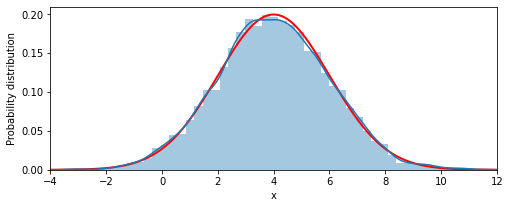

In [21]:
x = np.linspace(-4, 12, 1000)
y = stats.norm(mu, sigma).pdf(x)
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(x, y, 'r', lw=2)
sns.distplot(X, ax=ax)
ax.set_xlim(-4, 12)
ax.set_xlabel("x")
ax.set_ylabel("Probability distribution")

ImportError: ignored

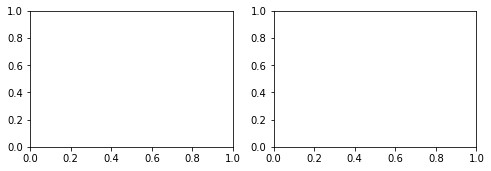

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(8, 2.5), squeeze=False)
mc.traceplot(trace, ax=axes)
axes[0, 0].plot(x, y, 'r', lw=0.5)

In [23]:
model = mc.Model()
with model:
    mean = mc.Normal('mean', 3.0)
    sigma = mc.HalfNormal('sigma', sd=1.0)
    X = mc.Normal('X', mean, sd=sigma)

In [24]:
model.vars

[mean, sigma_log__, X]

In [25]:
with model:
    start = mc.find_MAP()
start

/usr/local/lib/python3.6/dist-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -2.1562, ||grad|| = 1.6366: 100%|██████████| 8/8 [00:00<00:00, 827.14it/s]


{'X': array(3.),
 'mean': array(3.),
 'sigma': array(1.78644019e-293),
 'sigma_log__': array(-674.07720733)}

In [26]:
with model:
    step = mc.Metropolis()
    trace = mc.sample(100000, start=start, step=step)

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [X]
>Metropolis: [sigma]
>Metropolis: [mean]
100%|██████████| 100500/100500 [00:55<00:00, 1822.89it/s]


In [27]:
trace.get_values('sigma').mean()

1.7864401850541627e-293

In [28]:
X = trace.get_values('X')
X.mean()

3.0

In [29]:
trace.get_values('X').std()

0.0

/usr/local/lib/python3.6/dist-packages/pymc3/plots/__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


ImportError: ignored

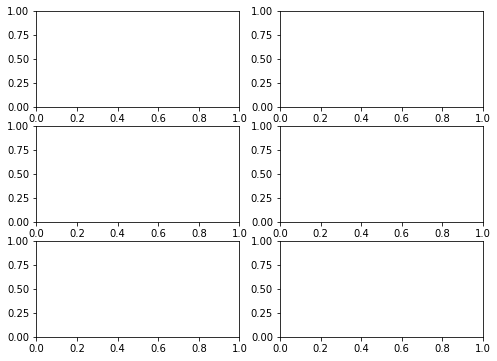

In [30]:
fig, axes = plt.subplots(3, 2, figsize=(8, 6), squeeze=False)
mc.traceplot(trace, varnames=['mean', 'sigma', 'X'], ax=axes)